<a href="https://colab.research.google.com/github/rithwik-tech/Ethereum-Transaction-Analysis-Using-Python/blob/main/Ethereum%20Transaction%20Analysis%20Using%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = "Ethereum_Transactions_100.csv"  # Ensure the correct file path
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Count of failed transactions
failed_txns = df[df["is_error"] == 1]
print(f"\nNumber of failed transactions: {len(failed_txns)}")

# Total transaction value
total_value = df["value"].sum()
print(f"\nTotal value of transactions: {total_value} ETH")

# Most active sender
most_active_sender = df["from_address"].value_counts().idxmax()
print(f"\nMost active sender: {most_active_sender}")

# Most active receiver
most_active_receiver = df["to_address"].value_counts().idxmax()
print(f"\nMost active receiver: {most_active_receiver}")

# Save failed transactions to a separate CSV file
failed_txns.to_csv("Failed_Transactions.csv", index=False)
print("\nFailed transactions saved to 'Failed_Transactions.csv'")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   block_number  100 non-null    int64  
 1   timestamp     100 non-null    object 
 2   hash          100 non-null    object 
 3   from_address  100 non-null    object 
 4   to_address    100 non-null    object 
 5   value         100 non-null    float64
 6   gas           100 non-null    int64  
 7   gas_price     100 non-null    int64  
 8   is_error      100 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 7.2+ KB
None

Summary Statistics:
       block_number       value          gas   gas_price    is_error
count  1.000000e+02  100.000000    100.00000  100.000000  100.000000
mean   1.500005e+07    2.741200  30161.33000   59.830000    0.470000
std    2.901149e+01    1.367745   5933.44258    5.808484    0.501614
min    1.500000e+07    0.190000  20074.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   block_number  100 non-null    int64         
 1   timestamp     100 non-null    datetime64[ns]
 2   hash          100 non-null    object        
 3   from_address  100 non-null    object        
 4   to_address    100 non-null    object        
 5   value         100 non-null    float64       
 6   gas           100 non-null    int64         
 7   gas_price     100 non-null    int64         
 8   is_error      100 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 7.2+ KB
None

Summary Statistics:
       block_number                      timestamp       value          gas  \
count  1.000000e+02                            100  100.000000    100.00000   
mean   1.500005e+07  2024-03-10 16:07:29.999999744    2.74120

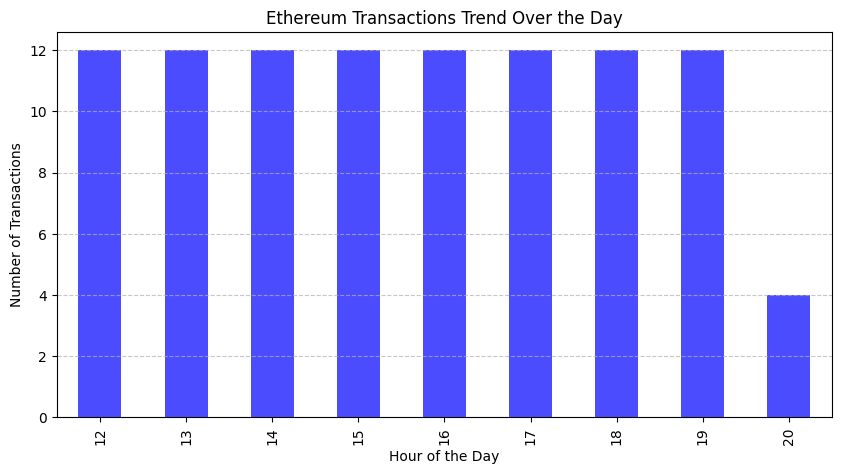

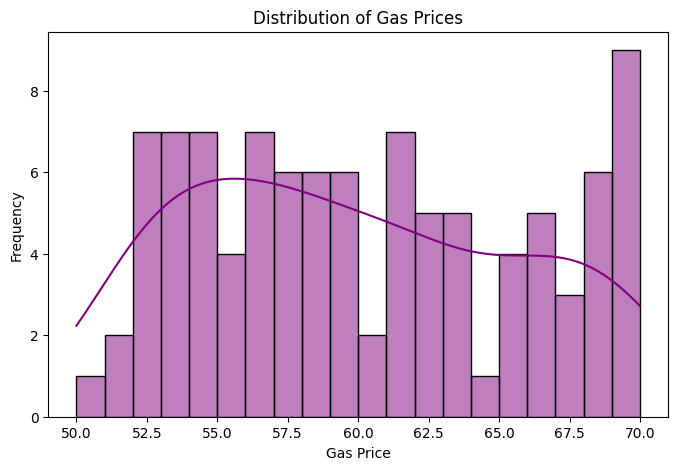

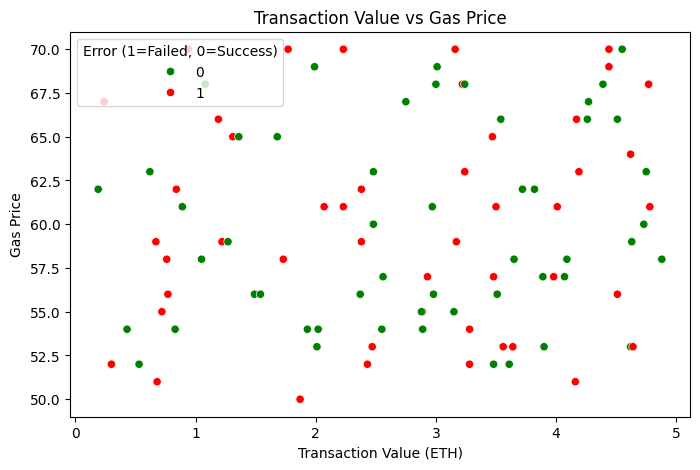


Failed transactions saved to 'Failed_Transactions.csv'


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Ethereum_Transactions_100.csv"  # Ensure the correct file path
df = pd.read_csv(file_path)

# Convert timestamp to datetime for analysis
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Display dataset information
print("Dataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Count of failed transactions
failed_txns = df[df["is_error"] == 1]
print(f"\nNumber of failed transactions: {len(failed_txns)}")

# Total transaction value
total_value = df["value"].sum()
print(f"\nTotal value of transactions: {total_value} ETH")

# Most active sender and receiver
most_active_sender = df["from_address"].value_counts().idxmax()
most_active_receiver = df["to_address"].value_counts().idxmax()
print(f"\nMost active sender: {most_active_sender}")
print(f"Most active receiver: {most_active_receiver}")

# Gas usage statistics
avg_gas_used = df["gas"].mean()
max_gas_price = df["gas_price"].max()
print(f"\nAverage Gas Used: {avg_gas_used}")
print(f"Maximum Gas Price: {max_gas_price}")

# Time-based transaction trend
plt.figure(figsize=(10, 5))
df["timestamp"].dt.hour.value_counts().sort_index().plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.title("Ethereum Transactions Trend Over the Day")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Visualizing gas price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["gas_price"], bins=20, kde=True, color="purple")
plt.xlabel("Gas Price")
plt.ylabel("Frequency")
plt.title("Distribution of Gas Prices")
plt.show()

# Scatter plot of transaction value vs gas price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["value"], y=df["gas_price"], hue=df["is_error"], palette=["green", "red"])
plt.xlabel("Transaction Value (ETH)")
plt.ylabel("Gas Price")
plt.title("Transaction Value vs Gas Price")
plt.legend(title="Error (1=Failed, 0=Success)")
plt.show()

# Save failed transactions to a separate CSV file
failed_txns.to_csv("Failed_Transactions.csv", index=False)
print("\nFailed transactions saved to 'Failed_Transactions.csv'")